In [87]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

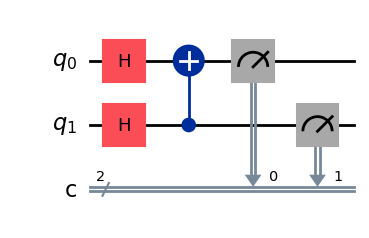

In [88]:
# For Z-basis

qc = QuantumCircuit(2,2)

qc.h(0)
qc.h(1)
qc.cx(1,0)

qc.measure(0,0)
qc.measure(1,1)

qc.draw(output="mpl")

{'01': 235, '11': 247, '00': 269, '10': 249}


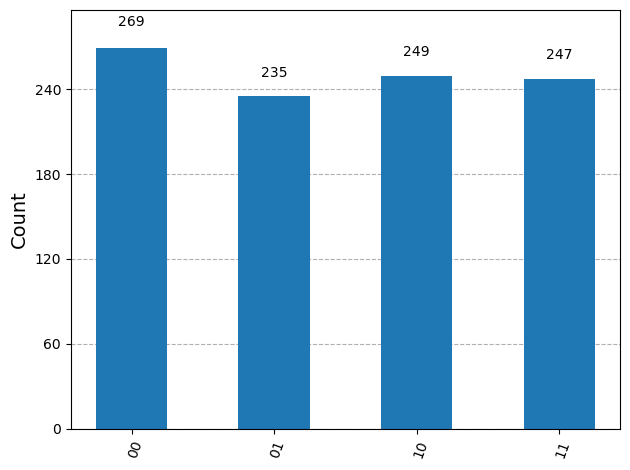

In [89]:
backend = AerSimulator()

counts = backend.run(qc, shots=1000).result().get_counts()

print(counts)

plot_histogram(counts)

In [90]:
def calculate_jz_and_delta_jz(counts, n_qubits=2):
    """
    Calculates <Jz> and ΔJz (standard deviation of Jz) for a 2-qubit system.
    """
    expectation = 0
    expectation_sq = 0
    total_shots = sum(counts.values())
    
    for bitstring, count in counts.items():
        n_zeros = bitstring.count('0')  # number of |0⟩s = spin up
        n_ones = bitstring.count('1')   # number of |1⟩s = spin down
        jz_value = (n_zeros - n_ones) / 2
        prob = count / total_shots
        expectation += prob * jz_value
        expectation_sq += prob * (jz_value ** 2)
    
    delta_jz = (expectation_sq - expectation ** 2) ** 0.5
    return expectation, delta_jz

jz, delta_jz = calculate_jz_and_delta_jz(counts)
print(f"Jz = {jz}")
print(f"ΔJz = {delta_jz}")

Jz = 0.02200000000000002
ΔJz = 0.717994428947746


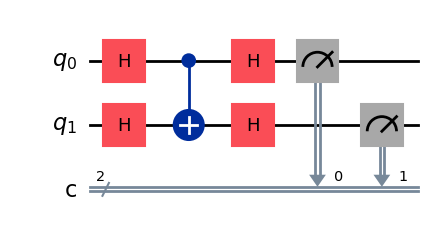

In [91]:
# For X-basis

qc1 = QuantumCircuit(2,2)

qc1.h([0,1])
qc1.cx(0,1)
qc1.h([0,1])

qc1.measure([0,1],[0,1])

qc1.draw(output="mpl")

{'00': 1000}


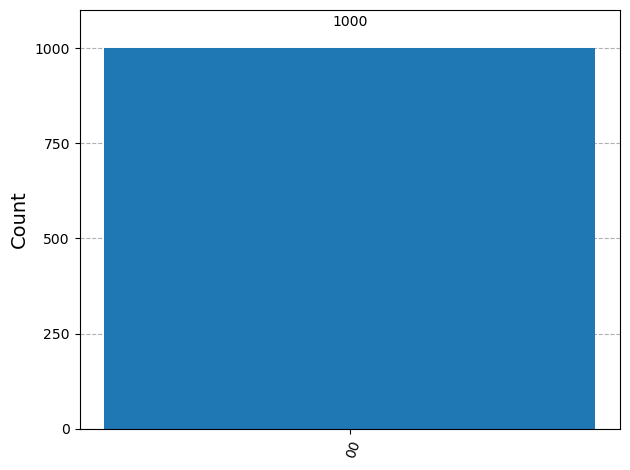

In [92]:
backend = AerSimulator()

counts = backend.run(qc1, shots=1000).result().get_counts()

print(counts)

plot_histogram(counts)

In [93]:
def calculate_jx_and_delta_jx(counts, n_qubits=2):
    """
    Calculates <Jx> and ΔJx (standard deviation of Jx) for a 2-qubit system.
    """
    expectation = 0
    expectation_sq = 0
    total_shots = sum(counts.values())
    
    for bitstring, count in counts.items():
        n_zeros = bitstring.count('0')  # number of |0⟩s = spin up
        n_ones = bitstring.count('1')   # number of |1⟩s = spin down
        jx_value = (n_zeros - n_ones) / 2
        prob = count / total_shots
        expectation += prob * jx_value
        expectation_sq += prob * (jx_value ** 2)
    
    delta_jx = (expectation_sq - expectation ** 2) ** 0.5
    return expectation, delta_jx

jx, delta_jx = calculate_jx_and_delta_jx(counts)
print(f"Jx = {jx}")
print(f"ΔJx = {delta_jx}")

Jx = 1.0
ΔJx = 0.0


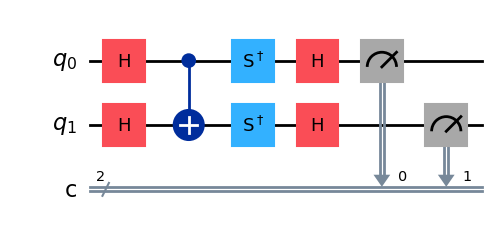

In [94]:
# For Y-basis
qc2 = QuantumCircuit(2,2)

qc2.h([0,1])
qc2.cx(0,1)
qc2.sdg([0,1])
qc2.h([0,1])

qc2.measure([0,1],[0,1])

qc2.draw(output="mpl")

{'01': 255, '11': 240, '00': 252, '10': 253}


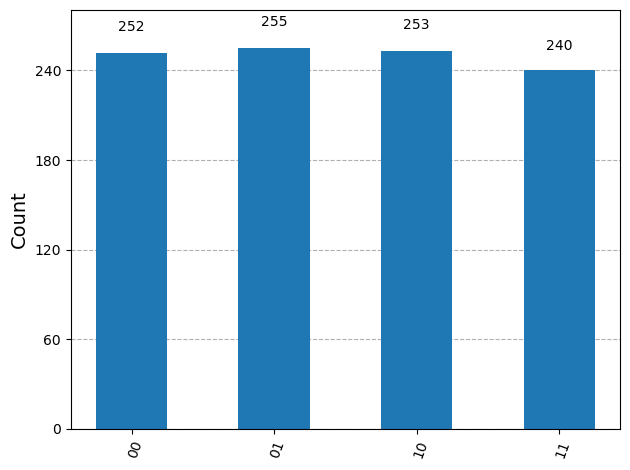

In [95]:
backend = AerSimulator()

counts = backend.run(qc2, shots=1000).result().get_counts()

print(counts)

plot_histogram(counts)

In [96]:
def calculate_jy_and_delta_jy(counts, n_qubits=2):
    """
    Calculates <Jy> and ΔJy (standard deviation of Jy) for a 2-qubit system.
    """
    expectation = 0
    expectation_sq = 0
    total_shots = sum(counts.values())
    
    for bitstring, count in counts.items():
        n_zeros = bitstring.count('0')  # number of |0⟩s = spin up
        n_ones = bitstring.count('1')   # number of |1⟩s = spin down
        jy_value = (n_zeros - n_ones) / 2
        prob = count / total_shots
        expectation += prob * jy_value
        expectation_sq += prob * (jy_value ** 2)
    
    delta_jy = (expectation_sq - expectation ** 2) ** 0.5
    return expectation, delta_jy

jy, delta_jy = calculate_jy_and_delta_jy(counts)
print(f"Jy = {jy}")
print(f"ΔJy = {delta_jy}")

Jy = 0.01200000000000001
ΔJy = 0.7013244612873559
